# MNIST database

<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/luisangelmendozavelasco.github.io/blob/master/_portfolio/IBM_AI_Engineering/portfolio-13.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>

**Objective**: Build a Deep Neural Network and a Convolutional Neural Network to classify handwritten digits.

The [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), short for Modified National Institute of Standards and Technology database, is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

The MNIST database contains 60,000 training images and 10,000 testing images of digits written by high school students and employees of the United States Census Bureau.

## Import libraries

In [1]:
import tensorflow as tf
from keras import Sequential, Input, layers, datasets, utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

2025-03-06 16:31:31.674168: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741300291.687239  172105 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741300291.691711  172105 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-06 16:31:31.704524: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load the dataset

In [2]:
(X_train, y_train), (X_right, y_right) = datasets.mnist.load_data()
X_validation, X_test, y_validation, y_test = train_test_split(X_right, y_right, train_size=0.5, random_state=0)

ds_train = tf.data.Dataset.from_tensor_slices((X_train[..., np.newaxis], utils.to_categorical(y_train))).batch(32)
ds_validation = tf.data.Dataset.from_tensor_slices((X_validation[..., np.newaxis], utils.to_categorical(y_validation))).batch(32)

print("X_train shape:", X_train.shape)
print("X_validation shape:", X_validation.shape)
print("X_test shape:", X_test.shape)

X_train shape: (60000, 28, 28)
X_validation shape: (5000, 28, 28)
X_test shape: (5000, 28, 28)


I0000 00:00:1741300294.320283  172105 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 641 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


## Visualize the dataset

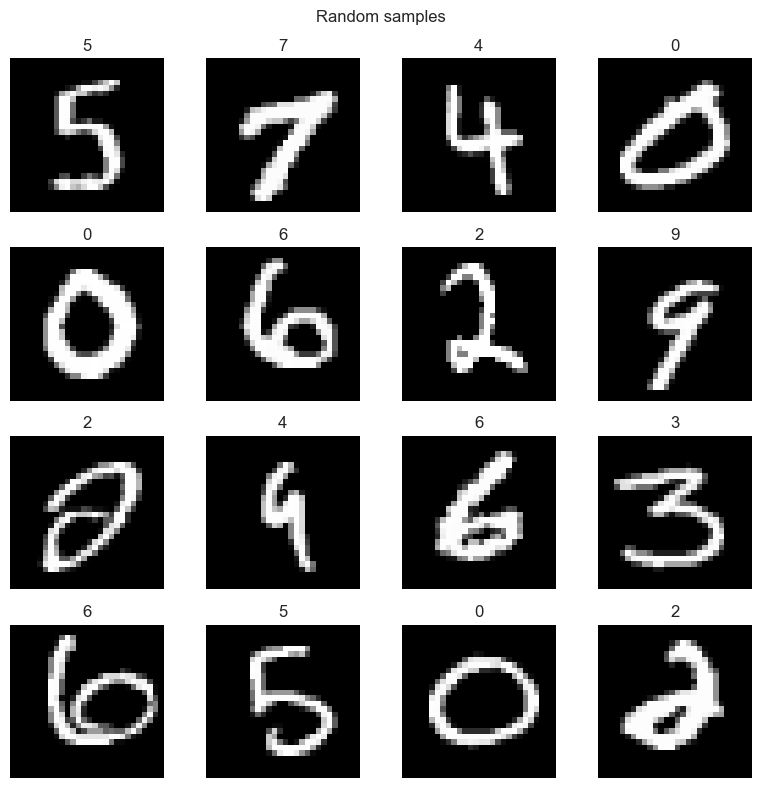

In [3]:
indexes = np.random.choice(range(0, X_train.shape[0]), size=16, replace=False)
samples = zip(X_train[indexes], y_train[indexes])

fig, axs = plt.subplots(4, 4, figsize=(8, 8))
fig.suptitle('Random samples')

for ax, sample in zip(axs.flatten(), samples):
    ax.imshow(sample[0], cmap="gray")
    ax.set_title(sample[1])
    ax.axis("off")

plt.tight_layout()
plt.show()

## Visualize the class distribution

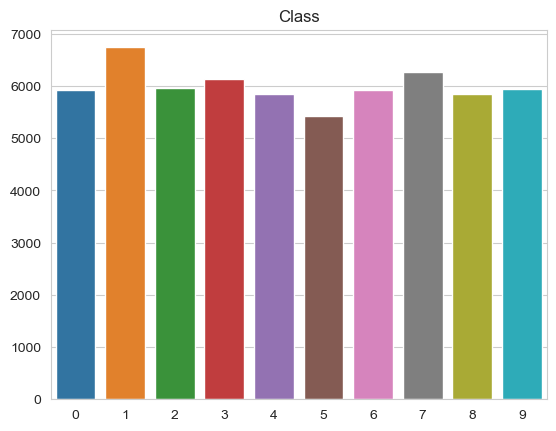

In [4]:
labels, sizes = np.unique(y_train, return_counts=True)

plt.figure()
sns.barplot(x=labels, y=sizes, hue=labels, palette="tab10", legend=False)
plt.title("Class")
plt.show()

## Build a Deep Neural Network

In [5]:
number_pixels = X_train.shape[1]**2
number_classes = np.unique(y_train).size

model_DNN = Sequential()
model_DNN.add(Input(shape=(28, 28, 1)))
model_DNN.add(layers.Rescaling(scale=1 / 255))
model_DNN.add(layers.Flatten())
model_DNN.add(layers.Dense(number_pixels, activation="relu"))
model_DNN.add(layers.Dense(100, activation="relu"))
model_DNN.add(layers.Dense(number_classes, activation="softmax"))

model_DNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 694,950 (2.65 MB)

 Trainable params: 694,950 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

## Compile and train the model

In [6]:
model_DNN.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['categorical_accuracy'])

epochs = 5
history_DNN = model_DNN.fit(ds_train, epochs=epochs, validation_data=ds_validation)

Epoch 1/5


I0000 00:00:1741300296.522000  172180 service.cc:148] XLA service 0x774c58003fd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741300296.522031  172180 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-03-06 16:31:36.538576: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741300296.619255  172180 cuda_dnn.cc:529] Loaded cuDNN version 90701


 126/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - categorical_accuracy: 0.7342 - loss: 0.9222

I0000 00:00:1741300297.439606  172180 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.9051 - loss: 0.3194 - val_categorical_accuracy: 0.9622 - val_loss: 0.1158
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - categorical_accuracy: 0.9716 - loss: 0.0929 - val_categorical_accuracy: 0.9640 - val_loss: 0.1196
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - categorical_accuracy: 0.9817 - loss: 0.0589 - val_categorical_accuracy: 0.9510 - val_loss: 0.1957
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - categorical_accuracy: 0.9869 - loss: 0.0403 - val_categorical_accuracy: 0.9756 - val_loss: 0.0927
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - categorical_accuracy: 0.9898 - loss: 0.0308 - val_categorical_accuracy: 0.9710 - val_loss: 0.1291


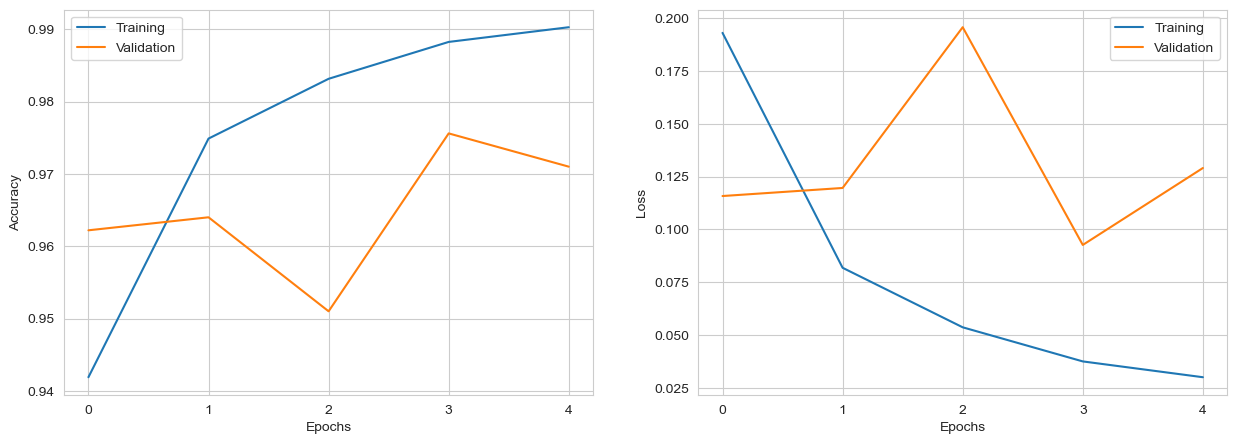

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(history_DNN.history['categorical_accuracy'])
ax1.plot(history_DNN.history['val_categorical_accuracy'])
ax1.set_xticks(range(epochs))
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend(["Training", "Validation"])

ax2.plot(history_DNN.history['loss'])
ax2.plot(history_DNN.history['val_loss'])
ax2.set_xticks(range(epochs))
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(["Training", "Validation"])

plt.show()

## Evaluate the model

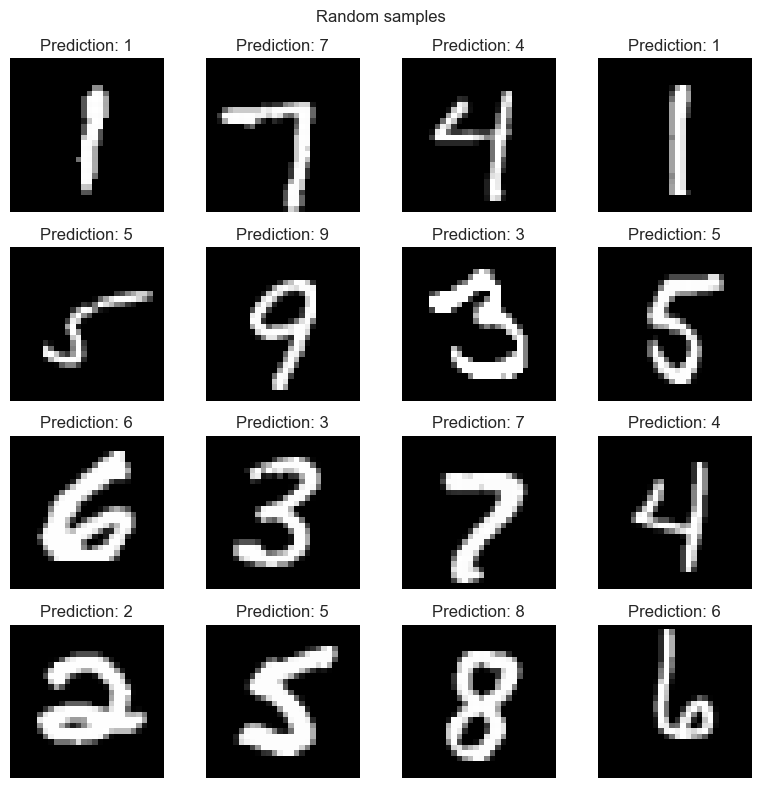

In [8]:
indexes = np.random.choice(range(0, X_test.shape[0]), size=16, replace=False)

fig, axs = plt.subplots(4, 4, figsize=(8, 8))
fig.suptitle('Random samples')

for image, ax in zip(X_test[indexes], axs.flatten()):
    prediction_proba = model_DNN.predict(np.expand_dims(image, axis=0), verbose=0)
    ax.imshow(image, cmap="gray")
    ax.set_title("Prediction: " + str(np.argmax(prediction_proba)))
    ax.axis("off")

plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0     0.9919    0.9859    0.9889       496
           1     0.9929    0.9912    0.9920       565
           2     0.9842    0.9822    0.9832       506
           3     0.9914    0.9198    0.9543       499
           4     0.9800    0.9741    0.9770       502
           5     0.9069    0.9933    0.9481       451
           6     0.9800    0.9649    0.9724       456
           7     0.9559    0.9886    0.9720       526
           8     0.9873    0.9551    0.9710       490
           9     0.9709    0.9823    0.9766       509

    accuracy                         0.9740      5000
   macro avg     0.9741    0.9737    0.9735      5000
weighted avg     0.9748    0.9740    0.9740      5000



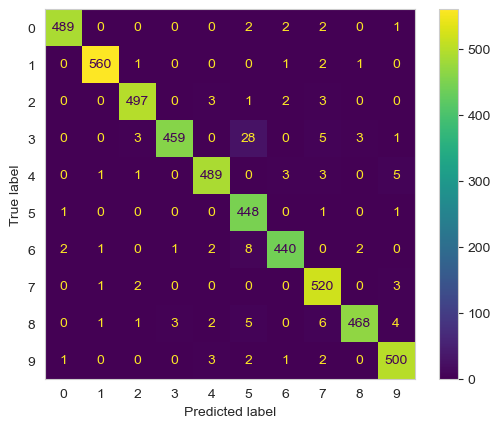

In [9]:
y_pred = np.argmax(model_DNN.predict(X_test, verbose=0), axis=1)

print(classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.show()

## Build a Convolutional Neural Network

In [10]:
number_classes = np.unique(y_train).size

model_CNN = Sequential()
model_CNN.add(Input(shape=(28, 28, 1)))
model_DNN.add(layers.Rescaling(scale=1 / 255))
model_CNN.add(layers.Conv2D(16, kernel_size=(5, 5), activation='relu'))
model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_CNN.add(layers.Conv2D(8, kernel_size=(2, 2), activation='relu'))
model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_CNN.add(layers.Flatten())
model_CNN.add(layers.Dense(100, activation='relu'))
model_CNN.add(layers.Dense(number_classes, activation="softmax"))

model_CNN.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 8)      │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,046 (86.12 KB)

 Trainable params: 22,046 (86.12 KB)

 Non-trainable params: 0 (0.00 B)

## Compile and train the model

In [11]:
model_CNN.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['categorical_accuracy'])

epochs = 5
history_CNN = model_CNN.fit(ds_train, epochs=epochs, validation_data=ds_validation)

Epoch 1/5


2025-03-06 16:31:53.743702: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[32,16,24,24]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,1,28,28]{3,2,1,0}, f32[16,1,5,5]{3,2,1,0}, f32[16]{0}), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


1851/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.8064 - loss: 1.6176

2025-03-06 16:31:57.252632: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[32,16,24,24]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,1,28,28]{3,2,1,0}, f32[16,1,5,5]{3,2,1,0}, f32[16]{0}), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-03-06 16:31:57.748825: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[8,16,24,24]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,1,28,28]{3,2,1,0}, f32[16,1,5,5]{3,2,1,0}, f32[16]{0}), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cu

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.8077 - loss: 1.6025 - val_categorical_accuracy: 0.9452 - val_loss: 0.1804
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.9607 - loss: 0.1291 - val_categorical_accuracy: 0.9578 - val_loss: 0.1462
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - categorical_accuracy: 0.9726 - loss: 0.0911 - val_categorical_accuracy: 0.9650 - val_loss: 0.1520
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - categorical_accuracy: 0.9781 - loss: 0.0741 - val_categorical_accuracy: 0.9688 - val_loss: 0.1253
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - categorical_accuracy: 0.9808 - loss: 0.0640 - val_categorical_accuracy: 0.9736 - val_loss: 0.1053


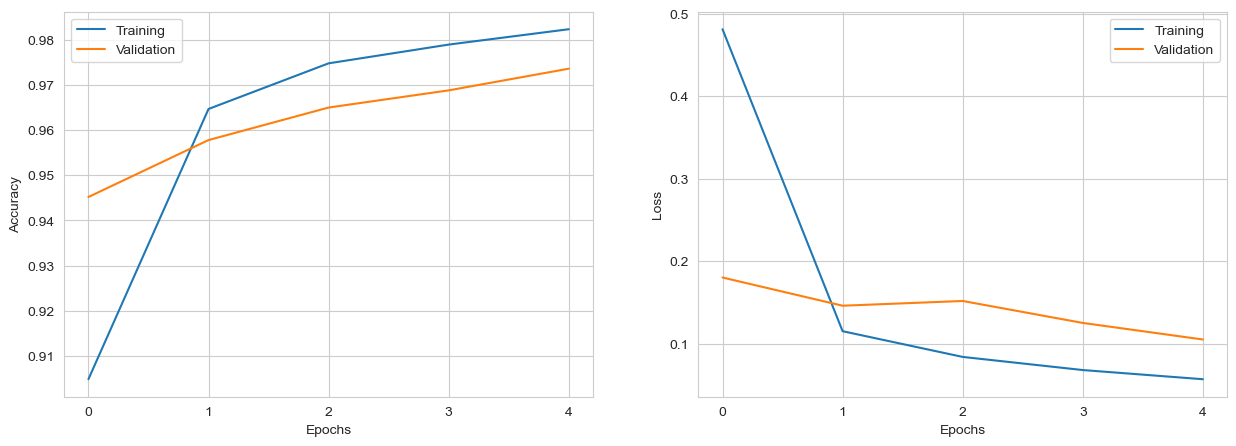

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(history_CNN.history['categorical_accuracy'])
ax1.plot(history_CNN.history['val_categorical_accuracy'])
ax1.set_xticks(range(epochs))
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend(["Training", "Validation"])

ax2.plot(history_CNN.history['loss'])
ax2.plot(history_CNN.history['val_loss'])
ax2.set_xticks(range(epochs))
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(["Training", "Validation"])

plt.show()

## Evaluate the model

2025-03-06 16:32:09.702482: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[1,16,24,24]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,1,28,28]{3,2,1,0}, f32[16,1,5,5]{3,2,1,0}, f32[16]{0}), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


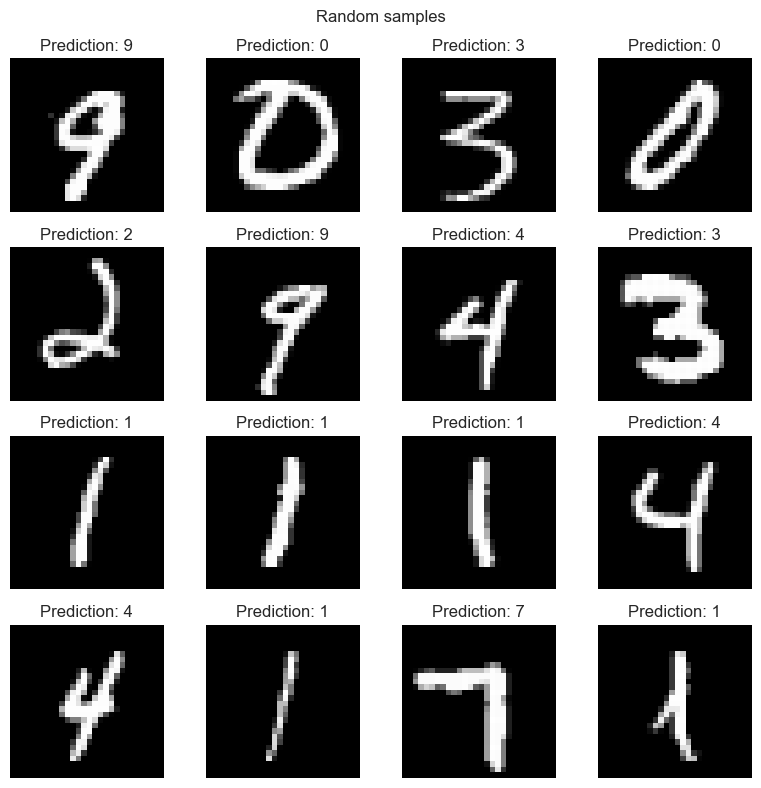

In [13]:
indexes = np.random.choice(range(0, X_test.shape[0]), size=16, replace=False)

fig, axs = plt.subplots(4, 4, figsize=(8, 8))
fig.suptitle('Random samples')

for image, ax in zip(X_test[indexes], axs.flatten()):
    prediction_proba = model_CNN.predict(np.expand_dims(image, axis=0), verbose=0)
    ax.imshow(image, cmap="gray")
    ax.set_title("Prediction: " + str(np.argmax(prediction_proba)))
    ax.axis("off")

plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0     0.9742    0.9899    0.9820       496
           1     0.9672    0.9929    0.9799       565
           2     0.9765    0.9862    0.9813       506
           3     0.9979    0.9699    0.9837       499
           4     0.9762    0.9821    0.9791       502
           5     0.9633    0.9889    0.9759       451
           6     0.9932    0.9649    0.9789       456
           7     0.9865    0.9734    0.9799       526
           8     0.9679    0.9837    0.9757       490
           9     0.9858    0.9528    0.9690       509

    accuracy                         0.9786      5000
   macro avg     0.9789    0.9785    0.9786      5000
weighted avg     0.9788    0.9786    0.9786      5000



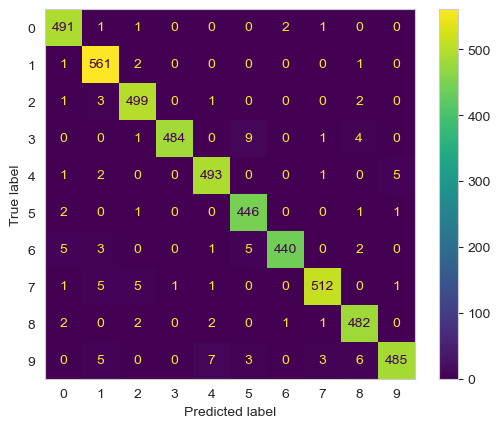

In [14]:
y_pred = np.argmax(model_CNN.predict(X_test, verbose=0), axis=1)

print(classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.show()